In [1]:
import argparse  
from code_part1 import foo
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)

In [62]:
import math

def getNpArr(data):
    N = len(data)
    tot_data_X = np.random.randn(N, 3)
    tot_data_y = np.random.randn(N, 1)
    for i in range(N):
        if (len(data[i])>1):
            tot_data_y[i][0] = float(data[i][1])
        temp = data[i][0].split('/')
#         tot_data_X[i][0] = (float(temp[0])-6.5)/math.sqrt(143/12) # Normalizing for better convergence
        tot_data_X[i][1] = (float(temp[2])-9.5) # Centering around 0 #Year
        tot_data_X[i][2] = (float(temp[0])-6.5) # centering around 0 #Month
        tot_data_X[i][0] = (float(temp[2]))/30.0 # Getting values roughly from 0 to 1 #Day
        tot_data_X[i][0] = tot_data_X[i][0]+tot_data_X[i][2] #sort of creates a linearity in dates
        
    return tot_data_X[:, :2], tot_data_y


df = pd.read_csv("2 Train.csv", header=None)
df = df[1:].sample(n = len(df)-1)
train_data = np.array(df.values)[:100]
dev_data = np.array(df.values)[100:]
train_X, train_y = getNpArr(train_data)
dev_X, dev_y = getNpArr(dev_data)

df = pd.read_csv("2 Test.csv", header=None)
df = df[1:]
test_data = np.array(df.values)
test_X, test_y = getNpArr(test_data)

# train_df = df[:int(0.8*len(df))].sample(frac=1)
# test_df = df[int(0.8*len(df)):].sample(frac=1)
# # Convert everything to a numpy array, as it makes my life easy. Works pretty much like MATLAB after that
# train_X = np.array(train_df.values)[:, 0:1]
# train_y = np.array(train_df.values)[:, 1:]
# test_X = np.array(test_df.values)[:, 0:1]
# test_y = np.array(test_df.values)[:, 1:2]

# plt.plot(train_X, train_y, "b.", label="Training data")
# plt.plot(test_X, test_y, "r.", label="Test data")
# plt.legend(loc="upper center")
# plt.xlabel("$X$", fontsize=18)
# plt.ylabel("$t$", rotation=0, fontsize=18)
# plt.savefig('given_data_plot_1A_20.png')
# plt.show()

In [ ]:
# temp = train_data[0][0].split('/')
# print(temp)
# print(temp[0], temp[1], temp[2])


[19.99217489] [-0.71175957] [-0.19658854] [-0.70843673] [-0.00490448]


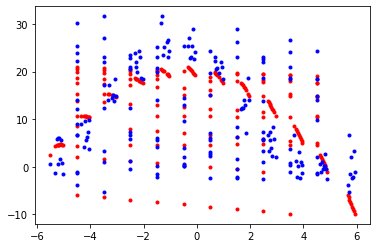

5.328936775410112
5.071667414780569
9.220984534949327


9.325085242746006

In [68]:
X_new_train = train_X
temp_X_train = train_X

X_new_dev = dev_X
temp_X_dev = dev_X

X_new_test = test_X
temp_X_test = test_X

lamb=0.02
M=3
for m in range(2, M, 1):
    temp_X_train = temp_X_train*train_X
    X_new_train = np.c_[X_new_train, temp_X_train]
    
    temp_X_dev = temp_X_dev*dev_X
    X_new_dev = np.c_[X_new_dev, temp_X_dev]
    
    temp_X_test = temp_X_test*test_X
    X_new_test = np.c_[X_new_test, temp_X_test]
    
X_fin_train = np.c_[np.ones((len(X_new_train), 1)), X_new_train]    

X_fin_dev = np.c_[np.ones((len(X_new_dev), 1)), X_new_dev]    

X_fin_test = np.c_[np.ones((len(X_new_test), 1)), X_new_test]    

theta_best = np.linalg.inv((lamb*np.identity(4+1)) + X_fin_train.T.dot(X_fin_train)).dot(X_fin_train.T).dot(train_y)
print(*theta_best)

plt.plot(train_X, X_fin_train.dot(theta_best), 'r.')
plt.plot(train_X, train_y, 'b.')
plt.show()

y_hat_train = X_fin_train.dot(theta_best)
err  = sum((y_hat_train-train_y)**2)
err/=len(y_hat_train)
print(math.sqrt(err))


y_hat_dev = X_fin_dev.dot(theta_best)
err  = sum((y_hat_dev-dev_y)**2)
err/=len(y_hat_dev)
print(math.sqrt(err))


# ########################################################################################################
# ########################################################################################################
# ########################################################################################################
# # !pip install sklearn
# import sklearn
# from sklearn.datasets import make_regression
# from sklearn.linear_model import LinearRegression
# from matplotlib import pyplot
# # define dataset
# # X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# # define the model
# model = LinearRegression()
# # fit the model
# model.fit(train_X, train_y)
# # get importance
# importance = model.coef_
# # summarize feature importance
# # for i,v in enumerate(importance):
# # 	print('Feature: %0d, Score: %.5f' % (i,v))
# # # plot feature importance
# # pyplot.bar([x for x in range(len(importance))], importance)
# # pyplot.show()
# y_hat = model.predict(train_X)
# err  = sum((y_hat-train_y)**2)
# err/=len(y_hat)
# print(math.sqrt(err))

# y_hat = model.predict(dev_X)
# err  = sum((y_hat-dev_y)**2)
# err/=len(y_hat)
# math.sqrt(err)
# ########################################################################################################
# ########################################################################################################
# ########################################################################################################

In [67]:
# y_hat_test = model.predict(test_X)
y_hat_test = X_fin_test.dot(theta_best)
print(y_hat_test)
ff = np.c_[test_data, y_hat_test]
print(ff)
df = pd.DataFrame(data = ff, columns = ["id", "value"])
df.to_csv("test1.csv", index=False)
df.head(10)

[[19.92320564]
 [15.21826748]
 [15.88913072]
 [-1.50908772]
 [19.99160229]
 [17.68919291]
 [10.58172598]
 [19.06643588]
 [ 8.28814571]
 [14.96116263]]
[['5/1/10' 19.92320563706588]
 ['4/1/09' 15.21826747806248]
 ['9/1/13' 15.889130717368785]
 ['1/1/06' -1.5090877166568881]
 ['2/1/07' 19.991602294883922]
 ['8/1/12' 17.689192907349057]
 ['6/1/14' 10.581725976877115]
 ['3/1/08' 19.066435880017877]
 ['12/1/04' 8.288145710737894]
 ['7/1/11' 14.961162629429129]]


,id,value
0,5/1/10,19.923206
1,4/1/09,15.218267
2,9/1/13,15.889131
3,1/1/06,-1.509088
4,2/1/07,19.991602
5,8/1/12,17.689193
6,6/1/14,10.581726
7,3/1/08,19.066436
8,12/1/04,8.288146
9,7/1/11,14.961163
